This is a notebook for solving problem sets in the course "Fixed Income Derivatives: Risk Management & Financial Institutions" at the University of Copenhagen in the Fall/Winter semester 2024.

# PS1

## Problem 2

For this problem, assume for simplicity that the year consists of 12 months each with exactly 30 days and that all payments occur at the end of day on the last day of the month. Also assume that there is
no credit risk and that the principal of all bonds is 100. 


The date today is December 30. 2019, the last day of the year, and the BBA have just at 11 AM announced the 3M LIBOR fixing to be 0.01570161 and the 6M LIBOR fixing to be 0.01980204. In addition,
the following bonds are traded in the market.

i) A 3 year fixed rate bullet bond maturing December 30. 2020 paying quarterly simple coupons of
4% annually and a price of 102.33689177.

ii) A 5 year fixed rate bullet bond maturing December 30. 2020 paying semi-annual simple coupons of
5% annually and a price of 104.80430234.

iii) A 10 year fixed rate bullet bond maturing June 30. 2021 paying semi-annual simple coupons of 5%
annually and a price of 105.1615306.

iv) An 8 year fixed rate bullet bond maturing June 30. 2021 paying quarterly simple coupons of 6%
annually and a price of 105.6581905.

v) A 5 year fixed rate bullet bond maturing December 30. 2021 paying quarterly simple coupons of
5% annually and a price of 104.028999992.

vi) A 30 year fixed rate bullet bond maturing December 30. 2021 paying annual simple coupons of 3%
annually and a price of 101.82604116.

Given this information, please solve the following problems

a) Set up the cashflow matrix corresponding to this information.


The cashflow matrix will be as follows:

In [15]:
import numpy as np
import matplotlib.pyplot as plt

C = np.zeros([N,M])
C[0,:] = [0.04*K*0.25,0.04*K*0.25,0.04*K*0.25,0.04*K*0.25,0.04*K*0.25+K,0,0,0,0]
C[1,:] = [0.05*K*0.5,0,0.05*K*0.5,0,0.05*K*0.5+K,0,0,0,0]
C[2,:] = [0.05*K*0.5,0,0.05*K*0.5,0,0.05*K*0.5,0,0.05*K*0.5+K,0,0]
C[3,:] = [0.06*K*0.25,0.06*K*0.25,0.06*K*0.25,0.06*K*0.25,0.06*K*0.25,0.06*K*0.25,0.06*K*0.25+K,0,0]
C[4,:] = [0.05*K*0.25,0.05*K*0.25,0.05*K*0.25,0.05*K*0.25,0.05*K*0.25,0.05*K*0.25,0.05*K*0.25,0.05*K*0.25,0.05*K*0.25+K]
C[5,:] = [0.03*K*1,0,0,0,0.03*K*1,0,0,0,0.03*K*1+K]

N, M = 6, 9
K = 100
T = np.array([0,0.25,0.5,0.75,1,1.25,1.5,1.75,2])
L_3M, L_6M = 0.01472717, 0.01893706
pi = np.array([102.33689177,104.80430234,105.1615306,105.6581905,104.02899992,101.82604116])

In [5]:

pi_new = np.array([101.98667646,102.96333877,102.68122237,104.17312216,102.76231402,98.8174065])
p_0_2M_new, p_0_5M_new = 0.99699147, 0.99088748
pi_swap_new = 0.02515099


b) Find the vector of zero coupon prices for all the times that you can based on the above information
and find the term structure of continuously compounded zero coupon spot rates (the yield curve).
Report the results and plot both curves in an appropriate diagram.

In [8]:
p, r = np.ones([M]), np.zeros([M])
p[1], p[2] = 1/(1+L_3M*T[1]), 1/(1+L_6M*T[2])
y = pi-p[0]*C[:,0]-p[1]*C[:,1]-p[2]*C[:,2]
x = C[:,3:]
p[3:M] = np.linalg.solve(x,y)
for i in range(1,M):
    r[i] = -np.log(p[i])/T[i]

c) Find 3M forward rates and plot these in the diagram from b)

d) Find the price of a 2 year floating rate bullet note with principal 100 paying 6M LIBOR issued
today.

e) Find the par swap rate for a 2-year interest rate swap paying semi-annual fixed coupons at annual
rate R to the ’receiver’ and quarterly 3M LIBOR to the ’payer’ issued today.

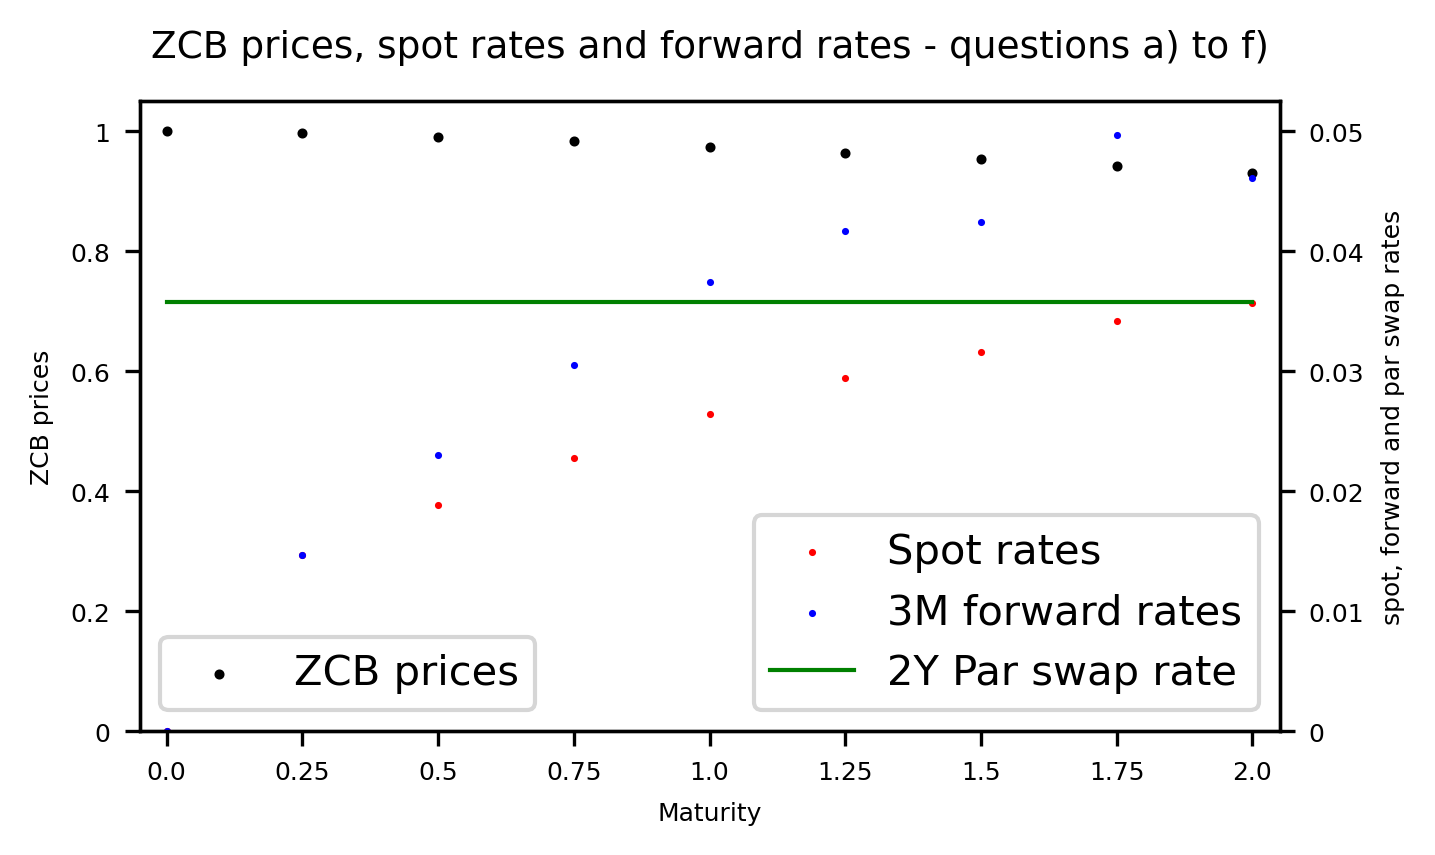

In [35]:
# problem c)
f_3M = np.zeros([M])
f_3M[0] = r[0]
for i in range(1,M):
    f_3M[i] = -(np.log(p[i])-np.log(p[i-1]))/(T[i]-T[i-1])

# Problem d)
pi_float = K*p[0]

# Problem e)
R = (1-p[8])/(0.5*(p[2]+p[4]+p[6]+p[8]))

T_new = np.zeros([M])
T_new[1:] = T[1:] - 1/12
C_new = np.zeros([N,M])
C_new[:,1:] = C[:,1:]

# Plot for quextions a) - e)
fig = plt.figure(constrained_layout=False, dpi = 300, figsize = (5,3))
fig.suptitle(f"ZCB prices, spot rates and forward rates - questions a) to f)", fontsize = 9)
gs = fig.add_gridspec(nrows=1,ncols=1,left=0.12,bottom=0.2,right=0.88,top=0.90,wspace=0,hspace=0)
ax = fig.add_subplot(gs[0,0])

ax.set_xticks(T)
ax.set_xticklabels(T,fontsize = 6)
ax.set_xlim([T[0]-0.05,T[-1]+0.05])
plt.xlabel(f"Maturity",fontsize = 6)
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax.set_yticklabels([0,0.2,0.4,0.6,0.8,1],fontsize = 6)
ax.set_ylim([0,1.05])
ax.set_ylabel(f"ZCB prices",fontsize = 6)
ax.scatter(T, p, s = 2, color = 'black', marker = "o", label = "ZCB prices")
plt.legend()
ax1 = ax.twinx()
ax1.set_yticks([0,0.01,0.02,0.03,0.04,0.05])
ax1.set_yticklabels([0,0.01,0.02,0.03,0.04,0.05],fontsize = 6)
ax1.set_ylim([0,0.0525])
ax1.set_ylabel(f"spot, forward and par swap rates",fontsize = 6)
ax1.scatter(T, r, s = 2, color = 'red', marker = ".", label="Spot rates")
ax1.scatter(T, f_3M, s = 2, color = 'blue', marker = ".", label="3M forward rates")
ax1.plot(T,R*np.ones([M]), color='green', linewidth = 1, marker = "", label = "2Y Par swap rate")
plt.legend()
plt.show()

f) Compare the par swap rate to the forward rates you computed in c).

Time now passes and the date becomes January 30. 2020. From a god friend you now know that
the price of zero coupon bond maturing on March 30. 2020  is 0.99699147 and that the price of a zero
coupon bond maturing on June 30. 2020 is 0.99088748. Also assume that the two corresponding ZCB
bonds can be constructed and traded. Due to market fluctuations, the prices of the bonds i)-vi) are
now [101.37241234, 102.33995192, 102.66601781, 104.16399942, 102.75471174, 98.79916103] and the price of the
receiver swap from e) is now −0.1161878302683732.

g) Set up a system of equations including the interest rate swap to compute zero coupon bond prices.
You should now have a system with more equations than unknowns.

h) Solve this system of equations to find zero coupon bond prices, zero coupon bond rates and 3M
forward rates as you did in b) and plot these. Hint: If C is an N × M-dimensional matrix where
N > M but C has full rank M, what is the rank of C′C?

i) You are now in a situation where you have more assets than future states and increasing the risk
of arbitrage. Check that the market is arbitrage free.

Now instead assume that the price of the zero coupon bond maturing on March 30. 2020 is 0.99391543,
that the price of a zero coupon bond maturing on June 30. 2020 is 0.98379379, that the prices of the
6 bonds are [100.00015573, 100.95055325, 100.77535024, 100.26763545, 100.48419302, 96.56064083] and that the
price of the receiver swap is −2.04869321.

j) Use OLS to estimate the zero coupon bond prices from market data.

k) Is the market arbitrage free? Try to find an arbitrage opportunity

In [38]:
# problem g)
C_swap = np.array([0,-0.25*K*L_3M-K,0.5*R*K,0,0.5*R*K,0,0.5*R*K,0,0.5*R*K+K])

# problem h)
p_new = np.ones([M])
p_new[0], p_new[1], p_new[2] = 1, p_0_2M_new, p_0_5M_new
C_new = np.vstack([C_new,C_swap])
y = np.hstack([pi_new,pi_swap_new]) - p_new[1]*C_new[:,1] - p_new[2]*C_new[:,2]
x = C_new[:,3:]
p_new[3:] = np.linalg.solve(np.matmul(np.transpose(x),x),np.matmul(np.transpose(x),y))
r_new, f_3M_new = np.zeros([M]), np.zeros([M])
f_3M_new[0] = np.nan
for i in range(1,M):
    r_new[i] = -np.log(p_new[i])/T_new[i]
    f_3M_new[i] = -(np.log(p_new[i])-np.log(p_new[i-1]))/(T_new[i]-T_new[i-1])

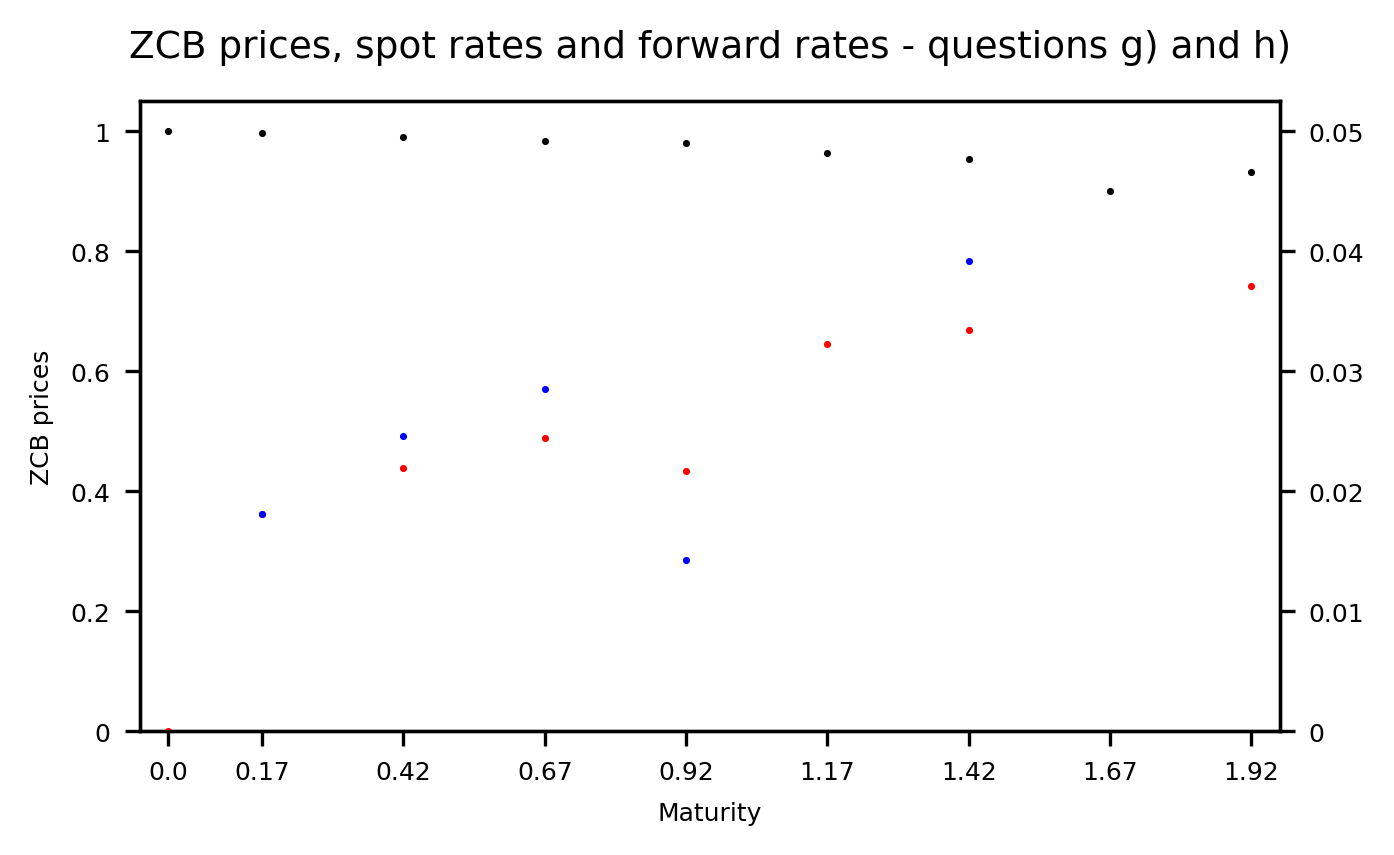

In [39]:
# Plot for quextions g) - h)
fig2 = plt.figure(constrained_layout=False, dpi = 300, figsize = (5,3))   #
fig2.suptitle(f"ZCB prices, spot rates and forward rates - questions g) and h)", fontsize = 9)
gs = fig2.add_gridspec(nrows=1,ncols=1,left=0.12,bottom=0.2,right=0.88,top=0.90,wspace=0,hspace=0)
ax = fig2.add_subplot(gs[0,0])

xtick_labels = [round(T_new[i],2) for i in range(0,M)]
ax.set_xticks(T_new)
ax.set_xticklabels(xtick_labels,fontsize = 6)
ax.set_xlim([T_new[0]-0.05,T_new[-1]+0.05])
plt.xlabel(f"Maturity",fontsize = 6)
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax.set_yticklabels([0,0.2,0.4,0.6,0.8,1],fontsize = 6)
ax.set_ylim([0,1.05])
ax.set_ylabel(f"ZCB prices",fontsize = 6)
ax.scatter(T_new, p_new, s = 2, color = 'black', marker = ".")

ax1 = ax.twinx()
ax1.set_yticks([0,0.01,0.02,0.03,0.04,0.05])
ax1.set_yticklabels([0,0.01,0.02,0.03,0.04,0.05],fontsize = 6)
ax1.set_ylim([0,0.0525])
ax1.scatter(T_new, r_new, s = 2, color = 'red', marker = ".")
ax1.scatter(T_new, f_3M_new, s = 2, color = 'blue', marker = ".")

plt.show()